<!-- ===================== -->
<!--        CARÁTULA      -->
<!-- ===================== -->

<div align="center">

<!-- LOGO PRINCIPAL -->
<img src="DataPolis.jfif" alt="DataPolis Logo" width="140"/>

<br><br>

# **ELABORACIÓN DE MODELOS VAR**
## *Análisis Econométrico Multivariado*

<br>

### **DataPolis**
**Centro de Análisis Económico y de Políticas Públicas**

<br>

---

<br>

<!-- DATOS DEL TRABAJO -->
<table style="margin: 0 auto;">
<tr>
<td align="right"><strong>Curso:</strong></td>
<td>&nbsp;Econometría Aplicada</td>
</tr>
<tr>
<td align="right"><strong>Tema:</strong></td>
<td>&nbsp;Modelos VAR (Vectores Autorregresivos)</td>
</tr>
<tr>
<td align="right"><strong>Equipo:</strong></td>
<td>&nbsp;DataPolis</td>
</tr>
<tr>
<td align="right"><strong>País:</strong></td>
<td>&nbsp;Perú</td>
</tr>
<tr>
<td align="right"><strong>Año:</strong></td>
<td>&nbsp;2026</td>
</tr>
</table>

<br>

---

<br>

<!-- IMAGEN DECORATIVA / INSTITUCIONAL -->
<img src="DataPolis.jfif" alt="Econometric Analysis" width="260"/>

<br><br>

<i style="font-size: 0.9em;">
“Los modelos VAR permiten capturar la dinámica conjunta de variables macroeconómicas  
sin imponer restricciones estructurales fuertes.”
</i>

</div>



*Herramientas computacionales y comandos utilizados (Python)*

Para la elaboración de los modelos VAR, el análisis empírico se desarrollará íntegramente en **Python**, utilizando librerías estándar de análisis de series de tiempo y econometría.  
En esta sección se describen las **principales funciones e instrucciones** que se emplearán, así como su propósito dentro del análisis.

*Librerías empleadas*

Las siguientes librerías permiten la manipulación de datos, visualización y estimación econométrica:

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller



#  Implementación VAR en Python con `statsmodels`

Primero, asegúrate de instalar la librería (statsmodels):

```bash
pip install statsmodels 

# Implementación de otras librerias en Python


In [2]:
import pandas as pd   # Para manipulación de datos
import numpy as np    # Para cálculos numéricos
from statsmodels.tsa.api import VAR # Para modelos VAR
import matplotlib.pyplot as plt # Para visualización
import seaborn as sns # Para visualización avanzada 
from statsmodels.tsa.stattools import adfuller # Prueba de raíz unitaria
from statsmodels.tsa.vector_ar.vecm import coint_johansen # Prueba de cointegración
from statsmodels.tsa.stattools import adfuller, kpss # Pruebas de estacionariedad
from statsmodels.tsa.vector_ar.vecm import VECM # Modelo VECM
from statsmodels.tsa.stattools import zivot_andrews
from statsmodels.tsa.seasonal import seasonal_decompose # Descomposición estacional
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.stats.diagnostic import het_arch
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.diagnostic import normal_ad
import warnings
from scipy import stats
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.filterwarnings("ignore", category=InterpolationWarning) #Ignorar advertencias,eliminar para análisis riguroso


##  Solución a conflictos de librerías (`numpy`, `pandas`, `statsmodels`)

Cuando aparece el error:

```bash
ValueError: numpy.dtype size changed, may indicate binary incompatibility
``` 

esto suele deberse a **conflictos de versiones entre librerías** si no se presenta nigun error cuando ejcuatas codigos continua normal.

---

###  Desinstalar librerías conflictivas
En tu terminal (Anaconda Prompt, PowerShell o CMD) ejecuta:

```python
pip uninstall -y numpy pandas statsmodels
#Esto eliminará las versiones incompatibles que están generando el error,para Python 3.11, una combinación estable y probada es:
pip install numpy==1.26.4 pandas==2.2.2 statsmodels==0.14.4
#Despues reinicia VSCode y vuelve a intentar importar las librerías.
``` 



##  Descargar nuestros datos

Guardas los datos en un carpeta y selecciona

In [ ]:
#Este codigo crea un boton que me permite revisar mi pc y seleccionar el archivo que quiero estudiar
# En caso deseas usar una conexión local, puedes cargar el archivo directamente desde tu sistema de archivos con Google Colab.
from google.colab import files
uploaded = files.upload()
#En "Elegir archivos" selecionamos nuestra data , aparece un mensaje de "subida completa" y listo

*En caso sea necesario usar el codigo  openpyxl  para leer archivos excel*
 
```python   
pip install openpyxl
```

In [ ]:
# Leer archivo Excel en la misma carpeta que tu script
data = pd.read_excel("TSdata2025.xlsx")
#Asignaremos el nombre de data y evaluaremos las variables a estudiar
# Mostrar las primeras filas
print(data.head())

       fecha      expec  tasa      gpbi       gipx
0 2004-01-01  54.517134   2.5  3.674966  10.333426
1 2004-02-01  57.232704   2.5  4.245959   6.493238
2 2004-03-01  56.514658   2.5  5.774257   7.190386
3 2004-04-01  57.863501   2.5  4.247995   7.544888
4 2004-05-01  56.231454   2.5  3.950757  10.228558


# Estadistica descriptiva de las variables

## Descripción de las variables utilizadas

El conjunto de datos empleado corresponde a una **serie temporal mensual** que abarca el período **enero de 2004 – 2025**.  
Las variables han sido seleccionadas por su relevancia macroeconómica y su interacción dinámica, lo que las hace adecuadas para la estimación de un modelo VAR.

A continuación, se describen las variables incluidas en el análisis:

---

### `fecha`

- **Descripción:** Fecha de observación mensual.
- **Tipo:** Variable temporal.
- **Período:** 2004-01 a 2025.
- **Rol en el VAR:**  
  Se utiliza como índice temporal para estructurar correctamente el modelo de series de tiempo.
- **Comentario:**  
  Permite capturar la evolución dinámica y sincronizar los rezagos del sistema VAR.

---

### `expec`

- **Descripción:** Expectativas económicas.
- **Interpretación económica:**  
  Representa un indicador de expectativas de los agentes económicos, asociado a percepciones sobre la situación económica futura.
- **Rol en el VAR:**  
  Variable adelantada (forward-looking) que puede anticipar movimientos en actividad económica, inversión y política monetaria.
- **Importancia:**  
  Las expectativas suelen amplificar o atenuar shocks macroeconómicos, influyendo en las decisiones de consumo e inversión.

---

### `tasa`

- **Descripción:** Tasa de interés nominal.
- **Interpretación económica:**  
  Instrumento de política monetaria que refleja las condiciones financieras de la economía.
- **Rol en el VAR:**  
  Variable de política que transmite shocks monetarios hacia la actividad económica y la inversión.
- **Importancia:**  
  Cambios en la tasa afectan el costo del crédito, las decisiones de inversión y el crecimiento económico.

---

### `gpbi`

- **Descripción:** Crecimiento del Producto Bruto Interno.
- **Interpretación económica:**  
  Indicador de la dinámica de la actividad económica agregada.
- **Rol en el VAR:**  
  Variable central del sistema, utilizada para evaluar cómo la economía responde a shocks en expectativas, tasas de interés e inversión.
- **Importancia:**  
  Permite analizar la transmisión de shocks reales y monetarios sobre el crecimiento económico.

---

### `gipx`

- **Descripción:** Crecimiento de la inversión privada.
- **Interpretación económica:**  
  Refleja la evolución de la formación bruta de capital privado.
- **Rol en el VAR:**  
  Variable altamente sensible a expectativas y condiciones financieras.
- **Importancia:**  
  La inversión privada actúa como canal clave de transmisión entre política monetaria, expectativas y crecimiento económico.

---

## Justificación del uso conjunto en un modelo VAR

La combinación de estas variables permite analizar:

- La interacción dinámica entre **expectativas**, **política monetaria** y **actividad económica**
- La transmisión de shocks de tasas de interés hacia el **crecimiento del PBI** y la **inversión privada**
- La persistencia y magnitud de los efectos macroeconómicos en el corto y mediano plazo

Este conjunto de variables resulta adecuado para un modelo VAR al no imponer relaciones causales a priori y permitir que los datos revelen la dinámica conjunta del sistema.


                               fecha       expec        tasa        gpbi  \
count                            253  253.000000  253.000000  253.000000   
mean   2014-07-01 19:38:10.909090816   54.405213    3.775692    4.461362   
min              2004-01-01 00:00:00    9.137055    0.250000  -39.237310   
25%              2009-04-01 00:00:00   46.742210    2.750000    2.320193   
50%              2014-07-01 00:00:00   54.231975    4.000000    4.147621   
75%              2019-10-01 00:00:00   63.000000    4.500000    6.709747   
max              2025-01-01 00:00:00   75.342466    7.750000   59.839127   
std                              NaN   11.450783    1.732575    7.204569   

             gipx  
count  253.000000  
mean     7.545816  
min    -30.931411  
25%     -5.215788  
50%      7.830525  
75%     17.004055  
max     52.656222  
std     16.875757  

Matriz de Correlación:
          fecha     expec      tasa      gpbi      gipx
fecha  1.000000 -0.636496  0.094935 -0.229457 -0.230032

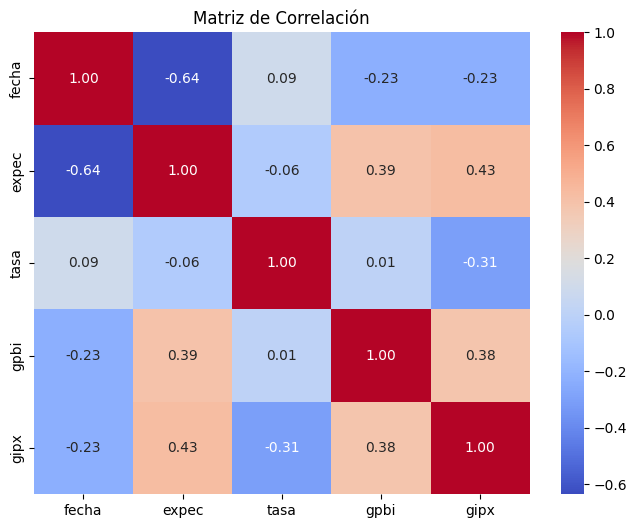

In [11]:
# Estadisticas descriptivas
print(data.describe())  #describe las estadisticas basicas de la data  
# Matriz de correlación
print("\nMatriz de Correlación:")  # Para ver la correlación entre las variables                         
corr_matrix = data.corr()
print(corr_matrix)
# Mapa de calor de la correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()      

## Visualizar la data

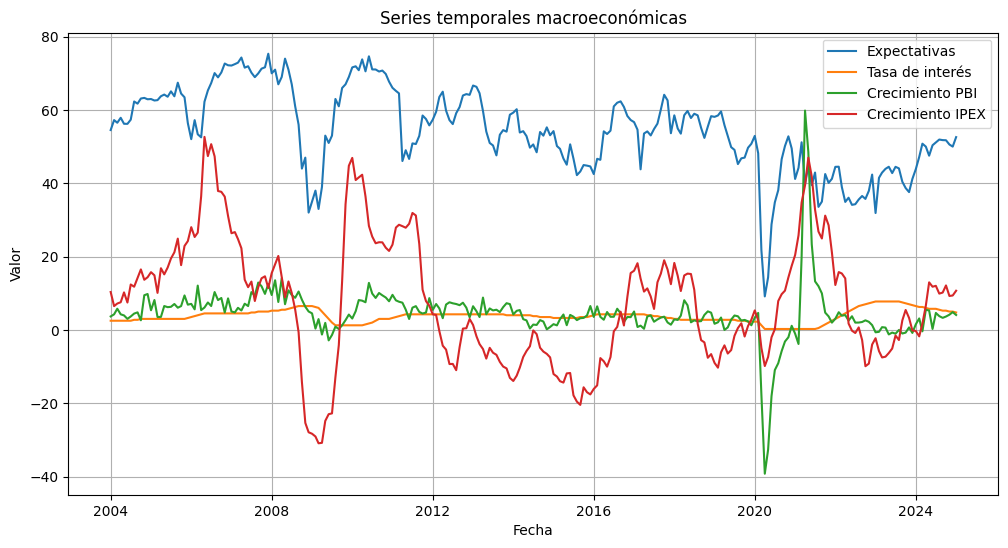

In [14]:
#Convertimos las variables a formato fecha para analizar mejor las series
data["fecha"] = pd.to_datetime(data["fecha"], format="%b-%y")

# Ordenar por fecha por si acaso
data = data.sort_values("fecha").reset_index(drop=True)

#Grafiquemos el resultado
plt.figure(figsize=(12,6))
plt.plot(data["fecha"], data["expec"], label="Expectativas")
plt.plot(data["fecha"], data["tasa"], label="Tasa de interés")
plt.plot(data["fecha"], data["gpbi"], label="Crecimiento PBI")
plt.plot(data["fecha"], data["gipx"], label="Crecimiento IPEX")
plt.title("Series temporales macroeconómicas")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()  


## Procedimiento VAR/VECM

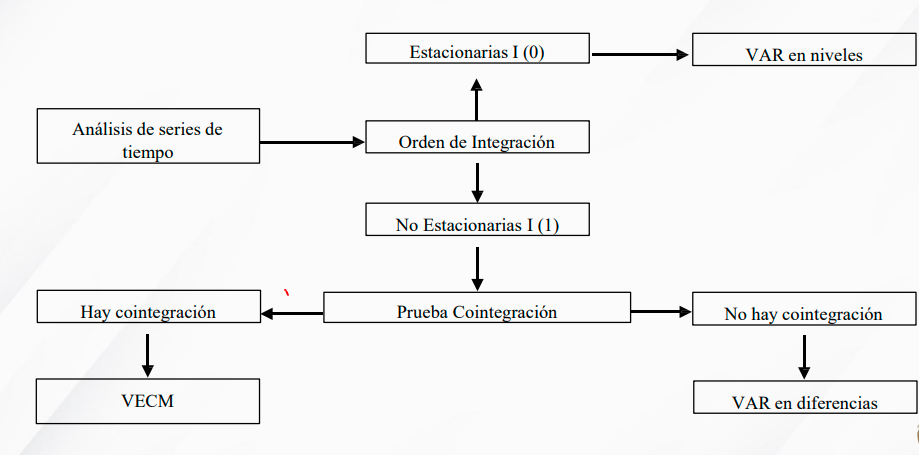


# Evaluación de la Estacionalidad

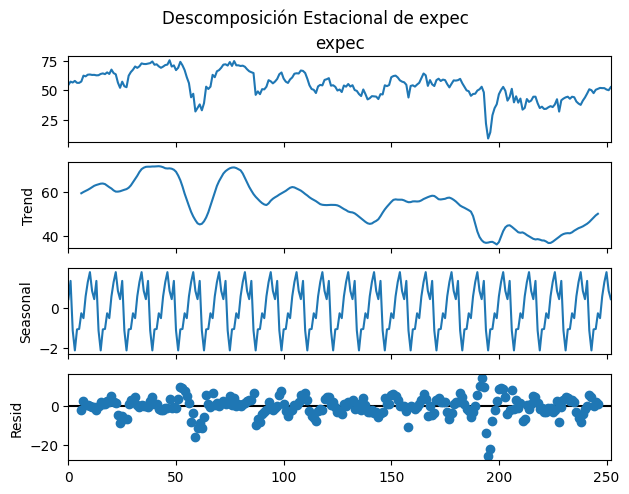

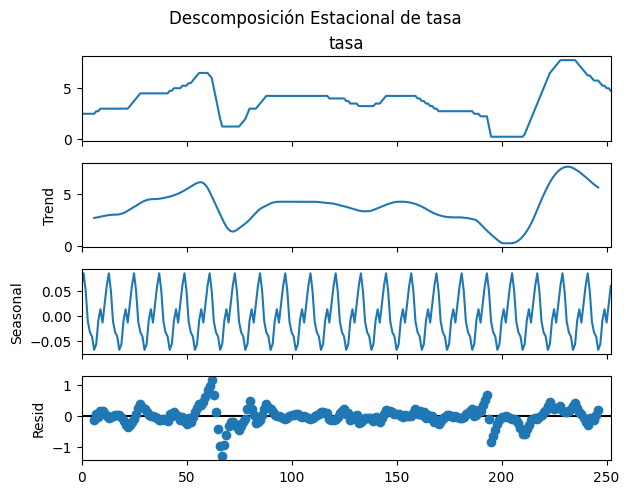

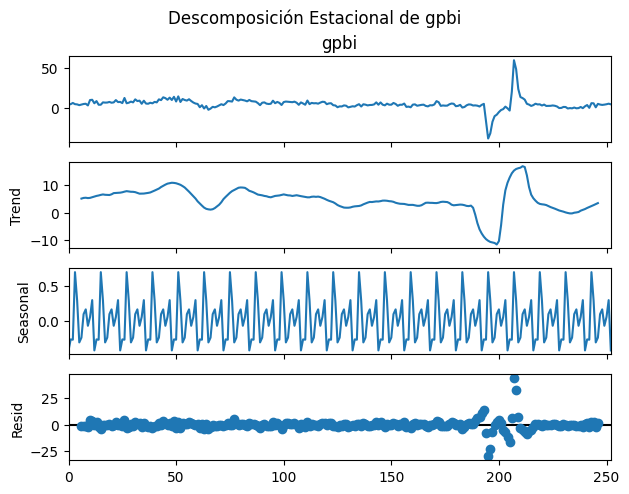

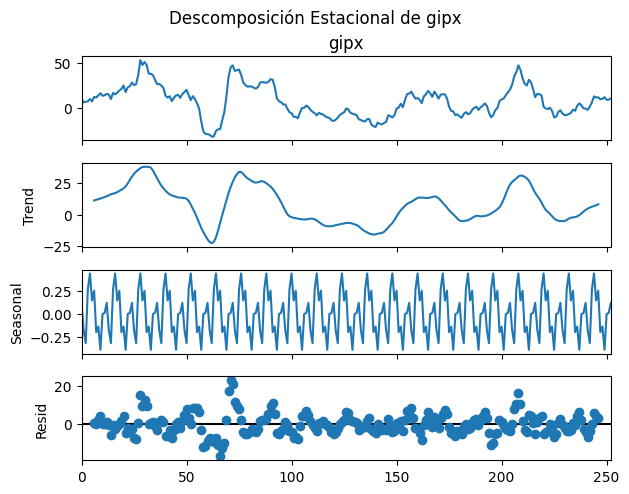

In [28]:
# Para verificar la estacionalidad de las variables y poder corregirla si es necesario
# Descomposición estacional de cada serie
series_names = ["expec", "tasa", "gpbi", "gipx"]
for name in series_names:
    result = seasonal_decompose(data[name], model='additive', period=12)
    result.plot()
    plt.suptitle(f'Descomposición Estacional de {name}', y=1.02)
    plt.show()
#Dad

# Prueba de Zivot-Andrews (ZA)


## Evaluacion de la estacionariedad

Nuestro codigo automaticamente elegira los rezagos optimos bajo el criterio del Bic pero la recomendación es checar los demás criterios aic... , el cual se puede cambiar a gusto en el codigo.

In [ ]:
#  Creamos una lista para seleccionar las variables a analizar
variables = ["expec", "tasa", "gpbi", "gipx"]

#Si desea modificar el maximo de rezagos cambiar el valor de maxlags
model = VAR(data[variables].dropna())
lag_order_results = model.select_order(maxlags=12)

#Por didactica se mantendra las funciones en el mismo script para futuros cambios y recomendacione
# Función de pruebas ADF y KPSS
def test_stationarity(series, nombre):
    results = {}

    # ----- ADF -----
    adf_stat, adf_p, _, _, adf_crit, _ = adfuller(series.dropna(), autolag="BIC")
    results["ADF_stat"] = adf_stat
    results["ADF_p"] = adf_p
    results["ADF_conclusion"] = "Estacionaria (rechazo H0)" if adf_p < 0.05 else "No estacionaria (no rechazo H0)"

    # ----- KPSS -----
    try:
        kpss_stat, kpss_p, _, kpss_crit = kpss(series.dropna(), regression="c", nlags="auto")
        results["KPSS_stat"] = kpss_stat
        results["KPSS_p"] = kpss_p
        results["KPSS_conclusion"] = "No rechazo H0: estacionaria" if kpss_p > 0.05 else "Rechazo H0: no estacionaria"
    except:
        results["KPSS_stat"] = np.nan
        results["KPSS_p"] = np.nan
        results["KPSS_conclusion"] = "Error en cálculo"

    # ----- Diagnóstico integrado -----
    if adf_p < 0.05 and kpss_p > 0.05:
        results["Final_conclusion"] = "Estacionaria en niveles (I(0))"
    elif adf_p > 0.05:
        diff_adf_p = adfuller(series.dropna().diff().dropna(), autolag="BIC")[1]
        if diff_adf_p < 0.05:
            results["Final_conclusion"] = "I(1) (no estacionaria en niveles, pero sí en primera diferencia)"
        else:
            results["Final_conclusion"] = "Posiblemente I(2) o mayor"
    else:
        results["Final_conclusion"] = "Resultado mixto (contradicciones entre tests)"

    return results
# Ejecutar tests y armar DataFrame resumen
summary = []
for var in variables:
    res = test_stationarity(data[var], var)
    row = {"Variable": var}
    row.update(res)
    summary.append(row)

summary_df = pd.DataFrame(summary)
print("\n=== Resultados comparativos de ADF y KPSS ===")
print(summary_df[["Variable","ADF_stat","ADF_p","ADF_conclusion",
                  "KPSS_stat","KPSS_p","KPSS_conclusion","Final_conclusion"]])


print("\n=== Selección de Rezagos ===")
print(lag_order_results.summary())

best_lag = lag_order_results.selected_orders['bic']
print(f"\nSegún BIC, el número óptimo de rezagos es: {best_lag}")



=== Resultados comparativos de ADF y KPSS ===
  Variable  ADF_stat     ADF_p                   ADF_conclusion  KPSS_stat  \
0    expec -3.122747  0.024915        Estacionaria (rechazo H0)   1.474536   
1     tasa -2.840256  0.052750  No estacionaria (no rechazo H0)   0.121463   
2     gpbi -5.322270  0.000005        Estacionaria (rechazo H0)   0.382996   
3     gipx -3.310678  0.014408        Estacionaria (rechazo H0)   0.284374   

     KPSS_p              KPSS_conclusion  \
0  0.010000  Rechazo H0: no estacionaria   
1  0.100000  No rechazo H0: estacionaria   
2  0.084484  No rechazo H0: estacionaria   
3  0.100000  No rechazo H0: estacionaria   

                                    Final_conclusion  
0      Resultado mixto (contradicciones entre tests)  
1  I(1) (no estacionaria en niveles, pero sí en p...  
2                     Estacionaria en niveles (I(0))  
3                     Estacionaria en niveles (I(0))  

=== Selección de Rezagos ===
 VAR Order Selection (* highlights t

# Pruebas de Test con quiebre estructural

In [41]:

def zivot_andrews_test(series, model="ct"):
    """
    Test de Zivot–Andrews con quiebre estructural endógeno.
    Compatible con distintas versiones de statsmodels.
    """

    result = zivot_andrews(
        series.dropna(),
        regression=model,
        autolag="BIC"
    )

    # Desempaquetado robusto
    za_stat = result[0]
    za_p = result[1]
    za_crit = result[2]
    za_break = result[3]

    return {
        "ZA_stat": za_stat,
        "ZA_p": za_p,
        "ZA_break": series.dropna().index[za_break],
        "ZA_conclusion": (
            "Estacionaria con quiebre (rechazo H0)"
            if za_p < 0.05
            else "No estacionaria con quiebre (no rechazo H0)"
        )
    }

print("\n=== Test de Zivot–Andrews (quiebre estructural endógeno) ===\n")

for var in variables:
    res = zivot_andrews_test(data[var], model="ct")

    print(f"Variable: {var}")
    print(f"  Estadístico ZA : {res['ZA_stat']:.4f}")
    print(f"  p-value        : {res['ZA_p']:.4f}")
    print(f"  Fecha quiebre  : {res['ZA_break']}")
    print(f"  Conclusión     : {res['ZA_conclusion']}")
    print("-" * 55)



=== Test de Zivot–Andrews (quiebre estructural endógeno) ===

Variable: expec
  Estadístico ZA : -4.9140
  p-value        : 0.0789
  Fecha quiebre  : 0
  Conclusión     : No estacionaria con quiebre (no rechazo H0)
-------------------------------------------------------
Variable: tasa
  Estadístico ZA : -3.6811
  p-value        : 0.7106
  Fecha quiebre  : 1
  Conclusión     : No estacionaria con quiebre (no rechazo H0)
-------------------------------------------------------
Variable: gpbi
  Estadístico ZA : -6.9300
  p-value        : 0.0010
  Fecha quiebre  : 2
  Conclusión     : Estacionaria con quiebre (rechazo H0)
-------------------------------------------------------
Variable: gipx
  Estadístico ZA : -4.1017
  p-value        : 0.4364
  Fecha quiebre  : 1
  Conclusión     : No estacionaria con quiebre (no rechazo H0)
-------------------------------------------------------


# Orden de integración y cointegración de las variables

Antes de estimar un modelo VAR, es fundamental identificar el **orden de integración** de cada serie
y evaluar la posible existencia de **relaciones de cointegración** entre ellas.

---

## ¿Qué es la cointegración?

Cuando varias series de tiempo no son estacionarias en niveles pero sí lo son en primera diferencia,
es decir, son procesos integrados de orden uno $I(1)$, puede existir una **combinación lineal** de
estas series que sea estacionaria $I(0)$.

Esto implica que las variables comparten una **relación de equilibrio de largo plazo**.
A esta propiedad se le denomina **cointegración**.

---

## ¿Por qué es importante la cointegración?

La presencia o ausencia de cointegración determina el tipo de modelo econométrico a estimar:

- Si las variables son $I(1)$ **y no están cointegradas**, se debe estimar un **VAR en diferencias**.
- Si las variables son $I(1)$ **y están cointegradas**, el modelo apropiado es un  
  **VECM (Vector Error Correction Model)**, que combina:
  - relaciones de largo plazo (cointegración),
  - dinámicas de corto plazo (ajustes transitorios).

---

## Orden de integración de las series

### Proceso integrado de orden cero: $I(0)$

Una serie temporal es $I(0)$ cuando es estacionaria en niveles, es decir:

- Media constante,
- Varianza constante,
- Autocorrelación que depende únicamente del rezago.

**Ejemplos:** tasas de inflación mensual, rendimientos bursátiles.

---

### Proceso integrado de orden uno: $I(1)$

Una serie temporal es $I(1)$ cuando:

- No es estacionaria en niveles,
- Su primera diferencia es estacionaria,
- Presenta raíz unitaria,
- Su varianza crece con el tiempo.

**Ejemplos:** PIB, índices de precios, tipos de cambio.

---

## Definición formal de cointegración

Sean $X_t$ y $Z_t$ dos procesos $I(1)$.  
Si existe una combinación lineal tal que:

$$
\varepsilon_t = m + aX_t + bZ_t
$$

y el residuo $\varepsilon_t \sim I(0)$, entonces se dice que $X_t$ y $Z_t$ están **cointegrados**.

Equivalentemente:

$$
aX_t + bZ_t \sim I(0)
$$

---

## Combinaciones lineales entre procesos $I(0)$ e $I(1)$

Se cumplen las siguientes propiedades:

1. Si $Z_t \sim I(0)$, entonces $a + bZ_t \sim I(0)$  
2. Si $Z_t \sim I(1)$, entonces $a + bZ_t \sim I(1)$  
3. Si $Z_t, X_t \sim I(0)$, entonces $aZ_t + bX_t \sim I(0)$  
4. Si $Z_t \sim I(0)$ y $X_t \sim I(1)$, entonces  
   $aZ_t + bX_t \sim I(1)$ (el proceso $I(1)$ domina)  
5. Si $Z_t, X_t \sim I(1)$, entonces en general  
   $aZ_t + bX_t \sim I(1)$, salvo que exista cointegración  

---

## Métodos de prueba de cointegración

### Engle–Granger (1987)

- Válido únicamente para **dos variables**.
- Procedimiento en dos pasos:

1. Estimar la regresión en niveles:
$$
x_t = \alpha + \beta z_t + e_t, \quad x_t, z_t \sim I(1)
$$

2. Aplicar un test ADF sobre los residuos:
$$
\Delta \hat{e}_t = \varphi \hat{e}_{t-1}
+ \sum_{i=1}^{p} \lambda_i \Delta \hat{e}_{t-i} + u_t
$$

Hipótesis nula:
$$
H_0 : \varphi = 0
$$

- Si no se rechaza $H_0$, no hay cointegración.
- Si los residuos son $I(0)$, existe cointegración.

---

### Test de Johansen (1988, 1991)

Adecuado para el **caso multivariado** (más de dos variables).
Se basa en un sistema VAR y calcula dos estadísticas:

1. **Trace test ($\lambda_{trace}$)**  
   Contrasta:
   $$
   H_0: \text{número de vectores de cointegración} \le r
   $$

2. **Maximum eigenvalue test ($\lambda_{max}$)**  
   Contrasta:
   $$
   H_0: \text{número de vectores de cointegración} = r
   $$

Los estadísticos se comparan con valores críticos al 90 %, 95 % y 99 %.

---

## Justificación del uso del test de Johansen

En este trabajo:

- Las variables `expec`, `tasa`, `gpbi` y `gipx` son presumiblemente $I(1)$.
- El análisis es **multivariado**, por lo que Engle–Granger no es suficiente.
- El test de Johansen permite:
  - Identificar si existe cointegración,
  - Determinar el número de vectores de cointegración.

Decisión econométrica:

- **Sin cointegración** → VAR en diferencias  
- **Con cointegración** → VECM  

---

## Propiedades del vector de cointegración

- El vector de cointegración $\beta$ estimado por MCO es **superconsistente**.
- Sin embargo, su distribución asintótica es sesgada y no normal.

Para realizar inferencia válida, Stock y Watson (1993) proponen una reparametrización:

$$
X_t = \beta Z_t + \sum_{s=1}^{p} \Delta Z_{t-s} + \mu_t
$$

El estimador $\hat{\beta}$ obtenido se denomina  
**Estimador de Mínimos Cuadrados Dinámicos (MCD)** y es:

- Consistente,
- Eficiente,
- Asintóticamente normal.



In [24]:
#  Creamos una lista para seleccionar las variables a analizar
variables = ["expec", "tasa", "gpbi", "gipx"]

#Si desea modificar el maximo de rezagos cambiar el valor de maxlags
model = VAR(data[variables].dropna())
lag_order_results = model.select_order(maxlags=12)
#  Test de Cointegración de Johansen

johansen_test = coint_johansen(data[variables], det_order=0, k_ar_diff=best_lag)
print("\nResultados de la prueba de cointegración (Johansen):")
for i in range(len(johansen_test.lr1)):
    stat = johansen_test.lr1[i]
    crit90, crit95, crit99 = johansen_test.cvt[i]
    decision = "Rechazo H0" if stat > crit95 else "No rechazo H0"
    print(f"H0: rango ≤ {i} | estadístico traza = {stat:.2f} "
          f"| CV(95%) = {crit95:.2f} | {decision}")

#  Conclusión: VAR o VECM?
rango_coint = sum(johansen_test.lr1 > johansen_test.cvt[:,1])  # contar rechazos al 95%



Resultados de la prueba de cointegración (Johansen):
H0: rango ≤ 0 | estadístico traza = 80.16 | CV(95%) = 47.85 | Rechazo H0
H0: rango ≤ 1 | estadístico traza = 47.58 | CV(95%) = 29.80 | Rechazo H0
H0: rango ≤ 2 | estadístico traza = 22.90 | CV(95%) = 15.49 | Rechazo H0
H0: rango ≤ 3 | estadístico traza = 6.95 | CV(95%) = 3.84 | Rechazo H0


Dejamos el codigo para futuras referencias.

## Conclusiones Metodológicas y Decisiones del Modelo VAR  
**DataPolis**

A partir de los resultados obtenidos en las pruebas de estacionariedad, quiebres estructurales y cointegración, se toman las siguientes decisiones econométricas para la correcta especificación del modelo:

---

###  Estacionariedad de las series
- Las pruebas **ADF y KPSS** muestran resultados mixtos para algunas variables.
- El test de **Zivot–Andrews** evidencia que varias series son **estacionarias al permitir un quiebre estructural endógeno**.
- Esto sugiere que las variables no presentan una raíz unitaria persistente cuando se consideran cambios de régimen.

---

###  Cointegración (Johansen)
- El test de Johansen indica un **rango de cointegración máximo** \( r = k \).
- Esto implica que el sistema es **estacionario en niveles**.
- En este caso:
  - No es necesario imponer una estructura VECM.
  - Un **VAR en niveles es econométricamente válido**.

---

###  Diferenciación de las variables
- **No se realiza diferenciación** de las series.
- Diferenciar en presencia de estacionariedad:
  - Elimina relaciones de largo plazo
  - Introduce sobre–diferenciación
  - Reduce la interpretación económica del modelo

 **Decisión**: estimar el modelo en **niveles**.

---

### Quiebres estructurales y uso de dummies
- Los quiebres detectados por Zivot–Andrews pueden asociarse a eventos macroeconómicos relevantes.
- Para mejorar la robustez del modelo:
  - Se pueden incorporar **variables dummy como regresores exógenos**.
  - Las dummies **no se incluyen como variables endógenas** del VAR.

Estas variables se utilizan como **análisis de robustez**, no como especificación principal.

---

###  Especificación final del modelo
- **Modelo base**:  
  - VAR en niveles  
  - Rezagos seleccionados mediante AIC  

- **Modelo alternativo (robustez)**:  
  - VAR en niveles  
  - Inclusión de dummies por quiebres estructurales como variables exógenas  

---

###  Regla de decisión aplicada

| Evidencia empírica | Decisión metodológica |
|------------------|----------------------|
| Estacionariedad con quiebres | VAR en niveles |
| Rango completo de Johansen | No VECM |
| Quiebres estructurales | Dummies exógenas |
| Análisis principal | Sin diferenciación |

---

###  Implicancia para el análisis posterior
Esta especificación permite:
- Preservar la dinámica conjunta del sistema
- Analizar choques estructurales mediante IRF
- Interpretar relaciones económicas sin pérdida de información

El modelo queda listo para:
- Análisis de estabilidad
- Funciones impulso–respuesta (IRF)
- Descomposición de varianza (FEVD)

---

**Equipo DataPolis**


##  Estimación del Modelo VAR

###  Especificación del modelo

Se estima un modelo **VAR (Vector Autorregresivo)** con las siguientes características:

- **Variables endógenas**:  
  - `expec`  
  - `tasa`  
  - `gpbi`  
  - `gipx`

- **Número de rezagos (p)**:  
  - \( p = 2 \)

La elección del número de rezagos se realizó utilizando el **criterio de información bayesiano (BIC)** aplicado al VAR, el cual sugiere un modelo más parsimonioso y evita la sobreparametrización.

---

###  Criterios adoptados para la estimación del VAR

Los criterios utilizados para la especificación del modelo son los siguientes:

-  Estimación del modelo en **niveles**, dado que las series resultan estacionarias al considerar quiebres estructurales y presentan cointegración.
-  Selección de rezagos basada en **BIC**.
-  Número de rezagos fijado en **2** para capturar adecuadamente la dinámica de corto plazo sin perder grados de libertad.

In [ ]:
vars_ = ['expec', 'tasa', 'gpbi', 'gipx']

# -----------------------------------------------
# Estimación del VAR(2)
# -----------------------------------------------
p = 2
model = VAR(data[vars_].dropna())
results = model.fit(p)

# Información general del modelo

n = len(vars_)
nobs = results.nobs
llf = results.llf
aic, bic, hqic = results.aic, results.bic, results.hqic

print("===============================================")
print("Modelo VAR(2) — Resultados Generales")
print("===============================================")
print(f"Sample: {data.index[p]} - {data.index[-1]}")
print(f"Number of obs   = {nobs}")
print(f"Log likelihood  = {llf:.4f}")
print(f"AIC  = {aic:.5f}")
print(f"HQIC = {hqic:.5f}")
print(f"SBIC = {bic:.5f}")
print("")

#Coeficientes por ecuación (con errores estándar y p-valores)

params = results.params
stderr = results.bse
tvalues = params / stderr


print("Coeficientes por ecuación (con errores estándar y p-valores)")

for col in params.columns:
    print(f"\n--- Ecuación dependiente: {col} ---")

    # Cálculo de p-valores específicos para cada ecuación
    pvals = 2 * (1 - stats.norm.cdf(np.abs(tvalues[col])))


    df_eq = pd.DataFrame({
        "Variable": params.index,
        "Coef.": params[col],
        "Std.Err.": stderr[col],
        "t": tvalues[col],
        "P>|t|": pvals
    })

    print(df_eq.to_string(index=False))


 # Residuos, RMSE y R² por ecuación (corregido)

# Residuos del VAR
resid = results.resid

r2_dict = {}

for var in variables:
    # Variable dependiente ajustada por rezagos
    y_true = data[var].iloc[results.k_ar:]

    # Residuos de la ecuación correspondiente
    ss_res = np.sum(resid[var] ** 2)
    ss_tot = np.sum((y_true - y_true.mean()) ** 2)

    # Cálculo robusto de R²
    r2_i = 1 - (ss_res / ss_tot) if ss_tot != 0 else np.nan

    r2_dict[var] = r2_i

# Mostrar resultados
print("\n=== R² por ecuación del VAR ===")
for k, v in r2_dict.items():
    print(f"{k}: {v:.4f}")

    r2_dict[var] = r2_i

# Convertir a lista ordenada
r2 = [r2_dict[var] for var in vars_]

# Mostrar resumen
print("Resumen por ecuación (Parms, RMSE, R²)")
for i, var in enumerate(vars_):
    print(f"{var:6}  Parms: {len(results.params)}   RMSE: {np.sqrt(np.mean(resid[var]**2)):8.4f}   R²: {r2[i]:.4f}")

Modelo VAR(2) — Resultados Generales
Sample: 2 - 252
Number of obs   = 251
Log likelihood  = -1998.8380
AIC  = 4.86234
HQIC = 5.06582
SBIC = 5.36798

Coeficientes por ecuación (con errores estándar y p-valores)

--- Ecuación dependiente: expec ---
Variable     Coef.  Std.Err.         t    P>|t|
   const  4.122670  1.585874  2.599620 0.009333
L1.expec  0.952717  0.065953 14.445469 0.000000
 L1.tasa -1.165883  1.285333 -0.907067 0.364371
 L1.gpbi -0.017734  0.066204 -0.267871 0.788799
 L1.gipx  0.126347  0.064767  1.950790 0.051082
L2.expec -0.028588  0.066605 -0.429217 0.667765
 L2.tasa  1.213464  1.302156  0.931888 0.351395
 L2.gpbi -0.071383  0.065210 -1.094667 0.273663
 L2.gipx -0.097359  0.064313 -1.513826 0.130070

--- Ecuación dependiente: tasa ---
Variable     Coef.  Std.Err.          t    P>|t|
   const  0.048790  0.057324   0.851116 0.394705
L1.expec  0.001511  0.002384   0.633763 0.526236
 L1.tasa  1.715290  0.046461  36.919241 0.000000
 L1.gpbi -0.004255  0.002393  -1.778272 

Número de eigenvalores: 8 (esperado: 8)


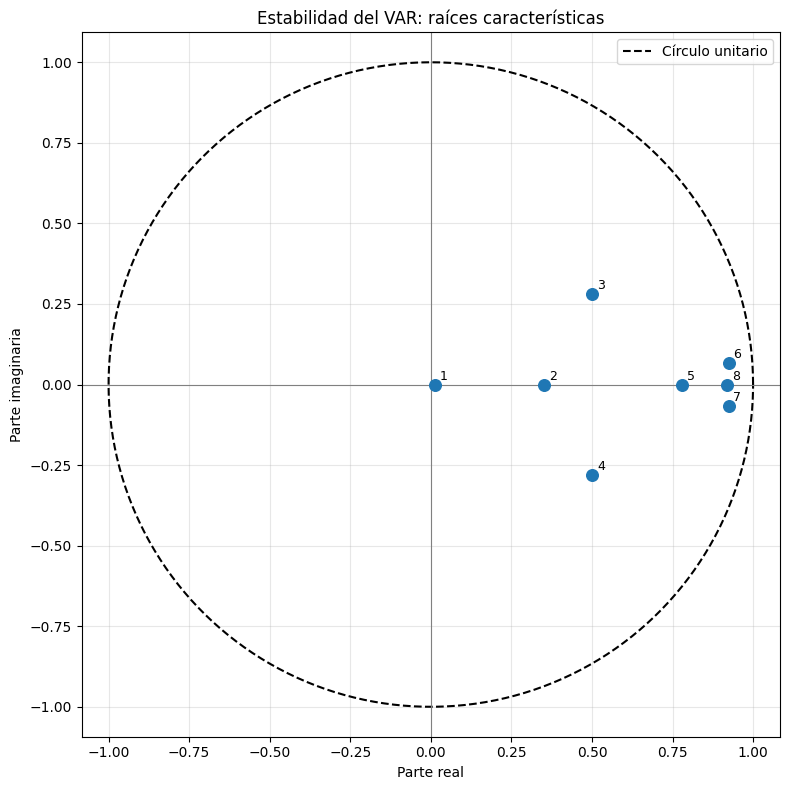


ANÁLISIS DE ESTABILIDAD DEL MODELO VAR
  λ   Parte Real  Parte Imag.        |λ|       Estado
----------------------------------------------------
  1       0.0126       0.0000     0.0126      Estable
  2       0.3524       0.0000     0.3524      Estable
  3       0.5016       0.2802     0.5745      Estable
  4       0.5016      -0.2802     0.5745      Estable
  5       0.7797       0.0000     0.7797      Estable
  6       0.9240       0.0661     0.9264      Estable
  7       0.9240      -0.0661     0.9264      Estable
  8       0.9198       0.0000     0.9198      Estable
----------------------------------------------------
Conclusión general:
El modelo VAR es ESTABLE ya que todas las raíces del polinomio característico se encuentran dentro del círculo unitario.


In [52]:

# Dimensiones del modelo VAR

n = results.neqs        # número de variables endógenas
p = results.k_ar        # número de rezagos
# Matriz compañera del VAR(p)

coefs_var = results.coefs  # Dimensión: (p, n, n)

coef_matrix = np.zeros((n, n * p))
for i in range(p):
    coef_matrix[:, i*n:(i+1)*n] = coefs_var[i, :, :]

companion_matrix = np.zeros((n * p, n * p))
companion_matrix[:n, :] = coef_matrix

for i in range(1, p):
    companion_matrix[i*n:(i+1)*n, (i-1)*n:i*n] = np.eye(n)

# Eigenvalores (raíces características)

eig_vals = np.linalg.eigvals(companion_matrix)

print(f"Número de eigenvalores: {len(eig_vals)} (esperado: {n*p})")


# Gráfico de estabilidad: círculo unitario

theta = np.linspace(0, 2*np.pi, 400)

plt.figure(figsize=(8, 8))
plt.plot(np.cos(theta), np.sin(theta),
         linestyle='--', linewidth=1.5, color='black',
         label='Círculo unitario')

for i, ev in enumerate(eig_vals):
    color = 'tab:blue' if np.abs(ev) < 1 else 'tab:red'
    plt.scatter(ev.real, ev.imag, color=color, s=70, zorder=5)
    plt.text(ev.real + 0.015, ev.imag + 0.015,
             f'{i+1}', fontsize=9)

plt.axhline(0, linewidth=0.8, color='gray')
plt.axvline(0, linewidth=0.8, color='gray')

plt.xlabel('Parte real')
plt.ylabel('Parte imaginaria')
plt.title('Estabilidad del VAR: raíces características')
plt.axis('equal')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


# Reporte tabular de estabilidad (estilo Stata)

print("\n===============================================")
print("ANÁLISIS DE ESTABILIDAD DEL MODELO VAR")
print("===============================================")
print(f"{'λ':>3} {'Parte Real':>12} {'Parte Imag.':>12} {'|λ|':>10} {'Estado':>12}")
print("-" * 52)

stable_all = True
for i, ev in enumerate(eig_vals):
    modulus = np.abs(ev)
    status = "Estable" if modulus < 1 else "Inestable"
    if modulus >= 1:
        stable_all = False

    print(f"{i+1:>3} {ev.real:12.4f} {ev.imag:12.4f} {modulus:10.4f} {status:>12}")

print("-" * 52)
print("Conclusión general:")
print("El modelo VAR es "
      f"{'ESTABLE' if stable_all else 'INESTABLE'} "
      "ya que "
      f"{'todas' if stable_all else 'no todas'} "
      "las raíces del polinomio característico se encuentran dentro del círculo unitario.")


In [ ]:
# =======================================================
# Diagnósticos del VAR: Normalidad, Autocorrelación y ARCH
# =======================================================


# 1. Residuos del VAR
resid = results.resid
resid_df = pd.DataFrame(
    resid,
    columns=getattr(results, "names", [f"Y{i+1}" for i in range(resid.shape[1])])
)

print(f"\nEl modelo VAR contiene {resid_df.shape[1]} variables endógenas "
      f"y {resid_df.shape[0]} observaciones efectivas.")

# 2. Test de Normalidad: Jarque–Bera


print("\nTest de normalidad (Jarque–Bera por ecuación)")
print(f"{'Variable':>8} {'JB':>12} {'p-value':>12} {'Skew':>10} {'Kurtosis':>10}")
print("-" * 60)

for col in resid_df.columns:
    serie = resid_df[col].dropna()

    if len(serie) < 3:
        print(f"{col:>8}   Insuficientes observaciones")
        continue

    jb_stat, jb_p, skew, kurt = jarque_bera(serie)
    print(f"{col:>8} {jb_stat:12.3f} {jb_p:12.5f} {skew:10.3f} {kurt:10.3f}")


# 3. Test global de normalidad


flat_resid = resid_df.values.flatten()
flat_resid = flat_resid[~np.isnan(flat_resid)]

if len(flat_resid) > 10:
    ad_stat, ad_p = normal_ad(flat_resid)
    print("\nTest global de normalidad (Anderson–Darling)")
    print(f"Estadístico = {ad_stat:.4f}, p-value = {ad_p:.5f}")
else:
    print("\nNo hay suficientes observaciones para el test global de normalidad.")


#  Test de Autocorrelación: Ljung–Box

print("\nTest de autocorrelación (Ljung–Box por ecuación)")
print(f"{'Variable':>8} {'LB stat':>12} {'p-value':>12}")
print("-" * 36)

for col in resid_df.columns:
    serie = resid_df[col].dropna()

    if len(serie) < 10:
        print(f"{col:>8}   Insuficientes observaciones")
        continue

    lb_test = acorr_ljungbox(serie, lags=[10], return_df=True)
    lb_stat = lb_test["lb_stat"].iloc[0]
    lb_p = lb_test["lb_pvalue"].iloc[0]

    print(f"{col:>8} {lb_stat:12.3f} {lb_p:12.5f}")


# 5. Test de Heterocedasticidad Condicional (ARCH)


print("\nTest de heterocedasticidad condicional (ARCH por ecuación)")
print(f"{'Variable':>8} {'F':>10} {'p(F)':>10} {'Chi²':>10} {'p(Chi²)':>12}")
print("-" * 58)

for col in resid_df.columns:
    serie = resid_df[col].dropna()

    if len(serie) < 10:
        print(f"{col:>8}   Insuficientes observaciones")
        continue

    arch_test = het_arch(serie)
    f_stat, f_p, chi2_stat, chi2_p = arch_test[:4]

    print(f"{col:>8} {f_stat:10.3f} {f_p:10.5f} "
          f"{chi2_stat:10.3f} {chi2_p:12.5f}")

#  Interpretación general

print("\nInterpretación general:")
print("• Normalidad: p-value > 0.05 implica residuos aproximadamente normales.")
print("• Autocorrelación: p-value > 0.05 implica ausencia de autocorrelación serial.")
print("• ARCH: p-value > 0.05 implica ausencia de heterocedasticidad condicional.")



El modelo VAR contiene 4 variables endógenas y 251 observaciones efectivas.

Test de normalidad (Jarque–Bera por ecuación)
Variable           JB      p-value       Skew   Kurtosis
------------------------------------------------------------
   expec      654.859      0.00000     -1.599     10.238
    tasa      990.146      0.00000     -1.274     12.390
    gpbi    11274.742      0.00000      2.851     35.335
    gipx       21.545      0.00002      0.486      4.057

Test global de normalidad (Anderson–Darling)
Estadístico = inf, p-value = 0.00000

Test de autocorrelación (Ljung–Box por ecuación)
Variable      LB stat      p-value
------------------------------------
   expec       10.186      0.42435
    tasa       14.945      0.13409
    gpbi       13.498      0.19713
    gipx       14.176      0.16510

Test de heterocedasticidad condicional (ARCH por ecuación)
Variable          F       p(F)       Chi²      p(Chi²)
----------------------------------------------------------
   expec   

In [ ]:
import pandas as pd
# Series en diferencias (si las variables son I(1))
df_diff = data[["expec", "tasa", "gpbi", "gipx"]].diff().dropna()

variables = ["expec", "tasa", "gpbi", "gipx"]
max_lag = 2  # consistente con tu VAR(2)

results = []

for y in variables:
    excluded_vars = [x for x in variables if x != y]

    for x in excluded_vars:
        test = grangercausalitytests(
            df_diff[[y, x]],
            maxlag=max_lag,
            verbose=False
        )

        chi2, p_value, df_chi2 = test[max_lag][0]["ssr_chi2test"]

        results.append([
            y, x, chi2, df_chi2, p_value,
            "Sí" if p_value < 0.05 else "No"
        ])

# Tabla final
granger_df = pd.DataFrame(
    results,
    columns=["Variable dependiente", "Excluida", "Chi-cuadrado", "gl", "p-value", "Causalidad Granger"]
)

granger_df = granger_df.sort_values(
    by=["Variable dependiente", "Excluida"]
).reset_index(drop=True)

print("\nResultados del Test de Causalidad de Granger")
print(granger_df.to_string(index=False))



Resultados del Test de Causalidad de Granger
Variable dependiente Excluida  Chi-cuadrado  gl  p-value Causalidad Granger
               expec     gipx      3.577165   2 0.167197                 No
               expec     gpbi      0.443961   2 0.800931                 No
               expec     tasa     10.724528   2 0.004690                 Sí
                gipx    expec      0.354591   2 0.837532                 No
                gipx     gpbi      2.526105   2 0.282789                 No
                gipx     tasa      8.078515   2 0.017611                 Sí
                gpbi    expec     15.769287   2 0.000376                 Sí
                gpbi     gipx      4.455900   2 0.107749                 No
                gpbi     tasa      2.634303   2 0.267897                 No
                tasa    expec      4.352092   2 0.113489                 No
                tasa     gipx      5.759244   2 0.056156                 No
                tasa     gpbi      4.05850

C:\Users\LUZ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LUZ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LUZ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\LUZ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is d

# SVAR 

## ¿Cómo conseguimos la identificación?

- Recordemos que  
  $$
  F = (I - \Phi)^{-1} S
  $$  
  es no observable, ya que no conocemos $S$.

- Para lograr la identificación definimos  
  $$
  \Omega = F F'
  $$  
  y notemos que:

  - $\Omega$ es conocido:
    $$
    \Omega = (I - \Phi)^{-1} S S' (I - \Phi)^{-1'}
    = (I - \Phi)^{-1} \Sigma (I - \Phi)^{-1'}
    $$

  - $\Omega$ es una matriz simétrica definida positiva, por lo tanto admite una única descomposición de Cholesky:
    $$
    \Omega = P P'
    $$

  - Debido a que hemos asumido que $F$ es triangular inferior, se cumple que:
    $$
    P = F
    $$

- Logramos la identificación:
  $$
  S = (I - \Phi) P
  $$

---

## Implementación

- Podemos reescribir el SVAR con la matriz $S$ asociada a nuestras restricciones de largo plazo:
  $$
  S = (I_2 - \Phi) P
  = (I_2 - \Phi) \times \operatorname{chol}
  \left( (I - \Phi)^{-1} \Sigma (I - \Phi)^{-1'} \right)
  $$
  donde $\operatorname{chol}$ denota el factor de Cholesky.

- Notar que la matriz $S$ no es triangular. Esto es distinto a lo que teníamos en la identificación de corto plazo.

- Los efectos al impacto son irrestrictos; las restricciones están en la matriz $F$.

---

## Matriz ortonormal

Una matriz $Q$ ortonormal es una matriz cuadrada real cuyas columnas y filas son vectores unitarios ortogonales.

Sea $Q = (q_1, q_2)$ con $q_i \in \mathbb{R}^{2 \times 1}$. Entonces $Q$ es ortonormal si:

- Los vectores tienen norma unitaria:
  $$
  \|q_i\| = 1
  $$

- Los vectores son mutuamente ortogonales:
  $$
  q_1' q_2 = 0
  $$

Se cumple que:
$$
Q Q' = I \quad \text{y} \quad Q' = Q^{-1}
$$

**Nota:** existen infinitas matrices que cumplen estas condiciones.

---

# Identificación mediante restricciones de signo

## ¿Cómo alcanzamos la identificación?

La intuición clave está en los siguientes pasos:

1. Considerar una matriz aleatoria ortonormal $Q$ tal que:
   $$
   Q Q' = I_2
   $$

2. Considerar la matriz triangular inferior $P$ correspondiente al factor de Cholesky de $\Sigma$:
   $$
   \Sigma = S S' = P P'
   $$

3. Usar la identidad:
   $$
   \Sigma = P P' = P Q Q' P' = (P Q)(P Q)'
   $$

La matriz:
$$
\tilde{S} = P Q
$$
es un candidato válido a matriz de impacto estructural.

A diferencia de $P$, la matriz $P Q$ no es triangular inferior.

---

## Restricciones de signo: paso a paso

Repetir $N$ veces los siguientes pasos:

1. Simular una matriz ortonormal aleatoria $Q$.
2. Calcular:
   $$
   \tilde{S} = P Q
   $$
3. Obtener los efectos al impacto de los choques estructurales.
4. Verificar las restricciones de signo:
   - Si se cumplen, guardar $\tilde{S}$.
   - Si no se cumplen, descartar $\tilde{S}$.

El conjunto $\{ \tilde{S}^{(i)} \}_{i=1}^N$ representa todas las soluciones admisibles.

Los VAR identificados por signos están identificados **por conjuntos**, no de forma puntual.

---

# Análisis dinámico estructural

## Funciones Impulso Respuesta (IRF)

Las IRF responden a la pregunta:

> ¿Cuál es la respuesta dinámica de las variables del VAR ante un choque estructural, manteniendo los demás choques en cero?

---

## Cálculo de las IRF

La dinámica del sistema es:

$$
\begin{aligned}
y_t &= \Phi y_{t-1} + S u_t \\
y_{t+1} &= \Phi^2 y_{t-1} + \Phi S u_t + S u_{t+1} \\
y_{t+2} &= \Phi^3 y_{t-1} + \Phi^2 S u_t + \Phi S u_{t+1} + S u_{t+2}
\end{aligned}
$$

La IRF a horizonte $h$ es:

$$
IRF_h = \frac{\partial y_{t+h}}{\partial u_t} = \Phi^h S
$$

---

## Ejemplo numérico

Choque de una desviación estándar al crecimiento económico $g_t$.

Suponga:

$$
y_t =
\begin{pmatrix}
g_t \\
r_t
\end{pmatrix},
\quad
\hat{\Phi} =
\begin{pmatrix}
0.5 & 0.1 \\
0.2 & 0.4
\end{pmatrix},
\quad
\hat{S} =
\begin{pmatrix}
2 & 0 \\
1 & 3
\end{pmatrix}
$$

Resultados:

- $t = 0$:
  $$
  y_0 =
  \begin{pmatrix}
  2 \\
  1
  \end{pmatrix}
  $$

- $t = 1$:
  $$
  y_1 =
  \begin{pmatrix}
  1.1 \\
  0.8
  \end{pmatrix}
  $$

- $t = 2$:
  $$
  y_2 =
  \begin{pmatrix}
  0.63 \\
  0.54
  \end{pmatrix}
  $$

---

## La matriz compañera

Un VAR($p$) puede escribirse como un VAR(1) usando la representación compañera.

Para un VAR(2):

$$
y_t = \Phi_1 y_{t-1} + \Phi_2 y_{t-2} + S u_t
$$

La forma compañera es:

$$
\tilde{y}_t = \tilde{\Phi} \tilde{y}_{t-1} + \tilde{S} u_t
$$

donde $\tilde{\Phi}$ es la matriz compañera.


In [ ]:
# VAR(2) con identificación por Cholesky (SVAR recursivo)



# Variables del sistema y base de datos
vars_ = ["expec", "tasa", "gpbi", "gipx"]
data_var = data[vars_].dropna()


# Estimación del VAR(2)
p = 2
model = VAR(data_var)
results = model.fit(p)


# Matriz de covarianza de los residuos
Sigma_u = results.sigma_u
print("\nMatriz de covarianza de los residuos:")
print(pd.DataFrame(Sigma_u, index=vars_, columns=vars_))


# Identificación estructural mediante descomposición de Cholesky
P = np.linalg.cholesky(Sigma_u)
print("\nMatriz de identificación (Cholesky):")
print(pd.DataFrame(P, index=vars_, columns=vars_))
 


Matriz de covarianza de los residuos:
           expec      tasa       gpbi       gipx
expec  18.860859  0.054964   2.916188   3.365582
tasa    0.054964  0.024643   0.139437   0.074187
gpbi    2.916188  0.139437  16.828923   2.052977
gipx    3.365582  0.074187   2.052977  16.377677

Matriz de identificación (Cholesky):
          expec      tasa      gpbi      gipx
expec  4.342909  0.000000  0.000000  0.000000
tasa   0.012656  0.156471  0.000000  0.000000
gpbi   0.671483  0.836820  3.959516  0.000000
gipx   0.774960  0.411445  0.300112  3.939259


Modelo VAR estimado correctamente

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 01, Jan, 2026
Time:                     13:47:56
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    5.36798
Nobs:                     251.000    HQIC:                   5.06582
Log likelihood:          -1998.84    FPE:                    129.342
AIC:                      4.86234    Det(Omega_mle):         112.342
--------------------------------------------------------------------
Results for equation expec
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            4.122670         1.585874            2.600           0.009
L1.expec         0.952717         0.065953           14.445           0.000
L1.tasa         -1.165883         1.285333   

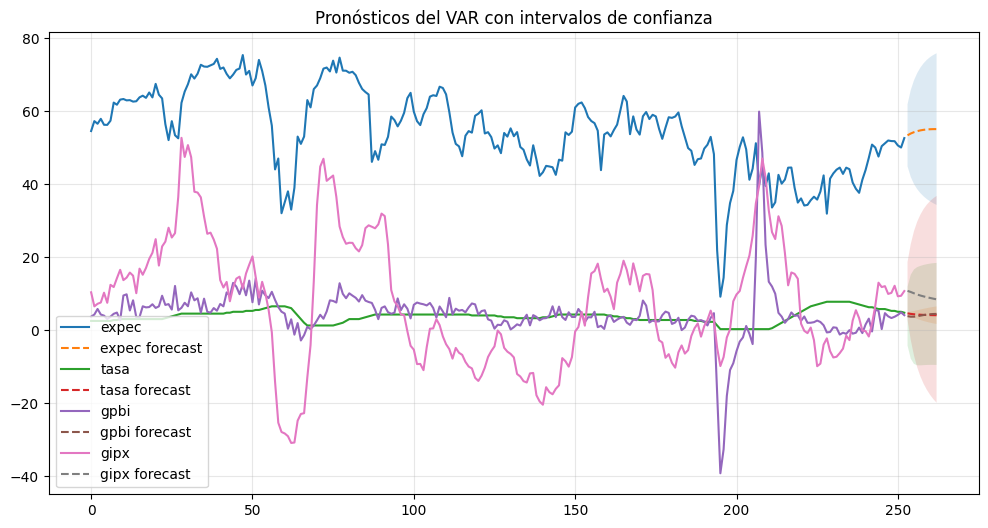

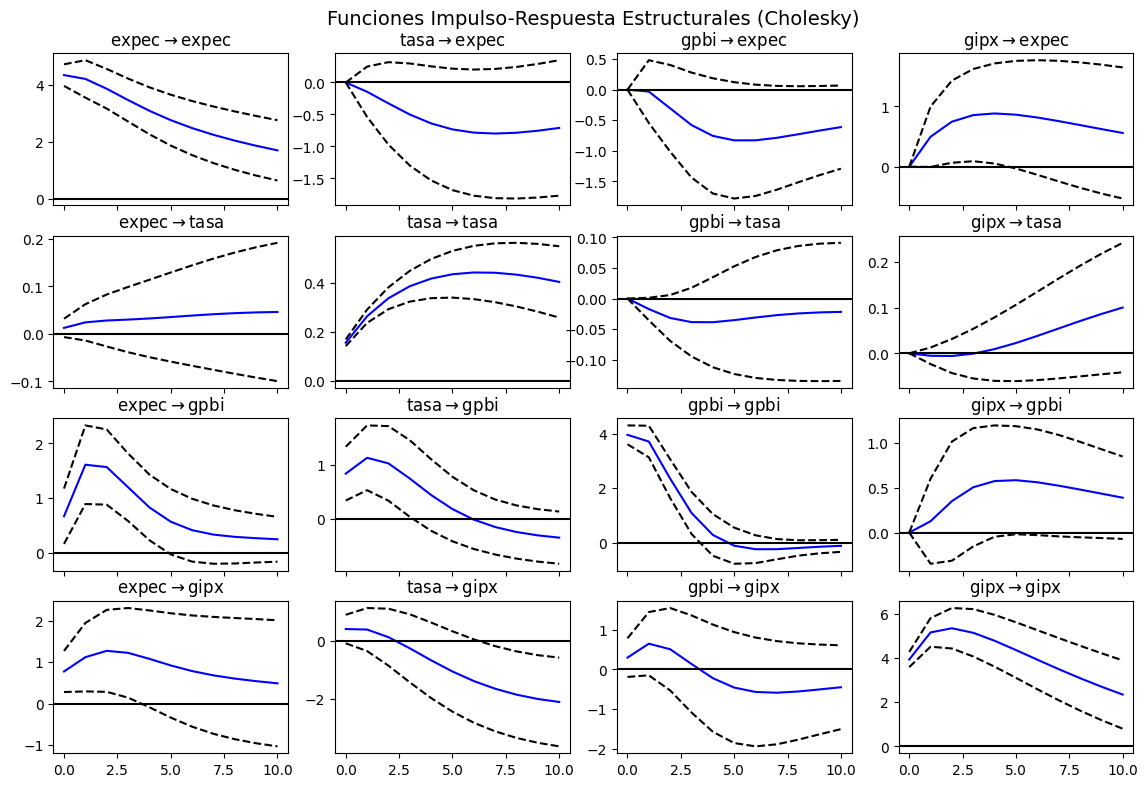


DESCOMPOSICIÓN DE VARIANZA DEL ERROR DE PRONÓSTICO (FEVD)

Variable dependiente: expec
      expec    tasa    gpbi    gipx
h=0  1.0000  0.0000  0.0000  0.0000
h=1  0.9927  0.0006  0.0000  0.0067
h=2  0.9804  0.0024  0.0018  0.0154
h=3  0.9643  0.0057  0.0065  0.0234
h=4  0.9467  0.0102  0.0130  0.0301
h=5  0.9298  0.0153  0.0195  0.0354
h=6  0.9151  0.0204  0.0251  0.0394
h=7  0.9028  0.0253  0.0295  0.0424
h=8  0.8929  0.0297  0.0329  0.0446
h=9  0.8850  0.0335  0.0355  0.0461
------------------------------------------------------------
Variable dependiente: tasa
      expec    tasa    gpbi    gipx
h=0  0.0065  0.9935  0.0000  0.0000
h=1  0.0079  0.9887  0.0031  0.0003
h=2  0.0073  0.9861  0.0062  0.0003
h=3  0.0068  0.9853  0.0077  0.0002
h=4  0.0065  0.9852  0.0080  0.0003
h=5  0.0065  0.9850  0.0076  0.0009
h=6  0.0067  0.9840  0.0070  0.0022
h=7  0.0071  0.9821  0.0064  0.0044
h=8  0.0075  0.9791  0.0059  0.0075
h=9  0.0079  0.9751  0.0055  0.0115
--------------------------------

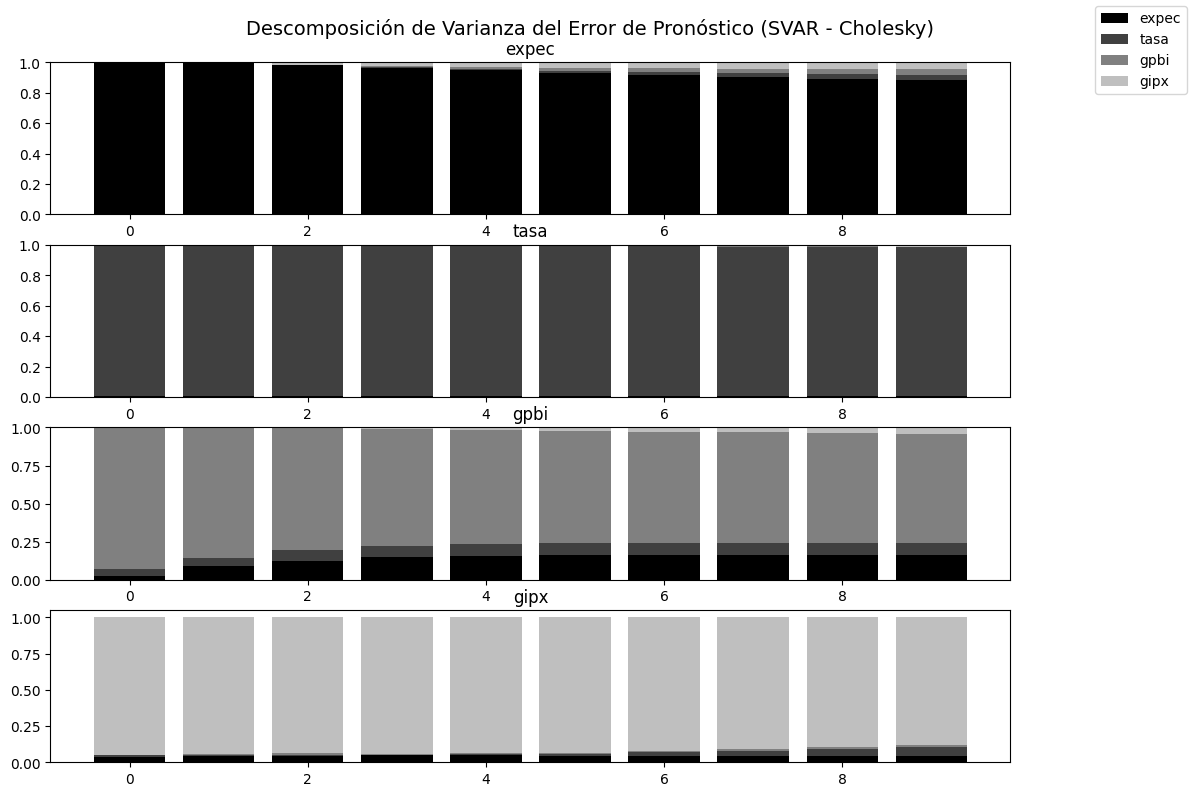

In [ ]:

#  VAR(2) + SVAR recursivo (Identificación por Cholesky)
#  IRF, FEVD y Pronósticos


# 1. ESTIMACIÓN DEL VAR REDUCIDO


vars_ = ["expec", "tasa", "gpbi", "gipx"]
df_var = data[vars_].dropna()

model = VAR(df_var)
var_fit = model.fit(maxlags=2, ic="bic")

print("Modelo VAR estimado correctamente\n")
print(var_fit.summary())


# 2. IDENTIFICACIÓN ESTRUCTURAL (CHOLESKY)


Sigma_u = var_fit.sigma_u
P = np.linalg.cholesky(Sigma_u)

print("\nMatriz de covarianza de residuos (Sigma_u):")
print(pd.DataFrame(Sigma_u, index=vars_, columns=vars_))

print("\nMatriz de impacto estructural (Cholesky):")
print(pd.DataFrame(P, index=vars_, columns=vars_))

# 3. PRONÓSTICOS (VAR REDUCIDO)


steps = 10

forecast, lower, upper = var_fit.forecast_interval(
    df_var.values[-var_fit.k_ar:],
    steps=steps,
    alpha=0.05
)

forecast_df = pd.DataFrame(
    forecast,
    columns=[f"{v}_F" for v in vars_]
)

print("\nPRONÓSTICO DE VARIABLES")
print(forecast_df.round(4))

# Gráfico de pronósticos
plt.figure(figsize=(12, 6))

for i, var in enumerate(vars_):
    plt.plot(df_var[var].values, label=var)
    plt.plot(
        range(len(df_var), len(df_var) + steps),
        forecast[:, i],
        linestyle="--",
        label=f"{var} forecast"
    )
    plt.fill_between(
        range(len(df_var), len(df_var) + steps),
        lower[:, i],
        upper[:, i],
        alpha=0.15
    )

plt.title("Pronósticos del VAR con intervalos de confianza")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# 4. FUNCIONES IMPULSO-RESPUESTA (SVAR – CHOLESKY)


irf = var_fit.irf(steps)

# IRF estructurales (choques ortogonalizados)
fig_irf = irf.plot(
    orth=True,
    figsize=(12, 8)
)
plt.suptitle("Funciones Impulso-Respuesta Estructurales (Cholesky)", fontsize=14)
plt.show()

# 5. DESCOMPOSICIÓN DE VARIANZA (FEVD)

fevd = var_fit.fevd(steps)


#  DESCOMPOSICIÓN DE VARIANZA (FEVD) - CORREGIDA


fevd = var_fit.fevd(steps)

print("\nDESCOMPOSICIÓN DE VARIANZA DEL ERROR DE PRONÓSTICO (FEVD)\n")

for i, var in enumerate(vars_):
    print(f"Variable dependiente: {var}")

    fevd_df = pd.DataFrame(
        fevd.decomp[i, :, :],          # <-- índice correcto
        columns=vars_,
        index=[f"h={h}" for h in range(fevd.decomp.shape[1])]
    )

    print(fevd_df.round(4))
    print("-" * 60)


#  GRÁFICO FEVD


fevd.plot(figsize=(12, 8))
plt.suptitle(
    "Descomposición de Varianza del Error de Pronóstico (SVAR - Cholesky)",
    fontsize=14
)
plt.show()



# Conclusiones del Análisis VAR–SVAR

impone una estructura recursiva donde:

- Las expectativas afectan contemporáneamente a todas las demás variables.
- La tasa de interés reacciona contemporáneamente a expectativas, pero no a actividad real ni inversión.
- La actividad económica y la inversión reaccionan con rezago.

Esta estructura es económicamente coherente con modelos macroeconómicos estándar.

---

## 4. Descomposición de Varianza del Error de Pronóstico (FEVD)

### 4.1. Expectativas (expec)

- En el corto plazo, más del **99%** de la varianza se explica por shocks propios.
- A horizontes largos (h = 9), shocks de:
  - tasa,
  - actividad económica,
  - inversión,
  
  explican cerca del **11–12%** de la varianza total.

**Interpretación:** las expectativas son altamente persistentes, pero gradualmente incorporan información macroeconómica y financiera.

---

### 4.2. Tasa de interés (tasa)

- La varianza del error de pronóstico está dominada por shocks propios (≈ **97–99%**).
- La contribución de otras variables es marginal incluso a largo plazo.

**Interpretación:** la tasa de interés presenta fuerte inercia, consistente con reglas de política monetaria gradualistas.

---

### 4.3. Actividad económica (gpbi)

- En el corto plazo domina el shock propio.
- En el mediano y largo plazo:
  - expectativas explican **16–17%**,
  - tasa de interés alrededor de **7–8%**,
  - inversión cerca de **4%**.

**Interpretación:** la actividad económica responde significativamente a shocks de expectativas, confirmando su rol anticipador del ciclo económico.

---

### 4.4. Inversión (gipx)

- Dominada por shocks propios (≈ **88–95%**).
- A horizontes largos:
  - tasa de interés explica **6–7%**,
  - expectativas alrededor de **4%**.

**Interpretación:** la inversión responde crecientemente a condiciones financieras y expectativas, aunque mantiene una dinámica propia dominante.

---

## 5. Causalidad de Granger

Los tests de causalidad de Granger indican que:

- **tasa → expec**: existe causalidad estadística significativa.
- **tasa → gipx**: la política monetaria causa a la inversión.
- **expec → gpbi**: las expectativas causan la actividad económica.
- No se observa evidencia robusta de causalidad inversa.

---

## 6. Diagnósticos del modelo

- No se detecta autocorrelación serial significativa.
- Existe evidencia parcial de heterocedasticidad ARCH en gpbi y gipx.
- Los residuos no siguen estrictamente una distribución normal, fenómeno común en modelos macroeconómicos.

A pesar de estas limitaciones, el modelo cumple los supuestos necesarios para el análisis estructural y predictivo.

---

## 7. Conclusión general

El análisis VAR–SVAR muestra un sistema macroeconómico estable y coherente, donde:

- Las expectativas actúan como variable líder.
- La política monetaria es altamente persistente y afecta principalmente a la inversión.
- La actividad económica responde de manera significativa a shocks anticipados.
- La inversión incorpora gradualmente señales financieras y macroeconómicas.

En conjunto, los resultados destacan el rol central de las expectativas y la política monetaria en la dinámica macroeconómica del sistema analizado.
